In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Matplotlib is building the font cache; this may take a moment.


In [2]:
## Notes:
## What to do with greater than/less than/etc. values?
## Handling results such as 'neg'

## Load file
first_part_file = "/home/ec2-user/SageMaker/Team-5/data_processing/tests in first part of the merged data.csv"
first = pd.read_csv(first_part_file)

## Print names of all tests in table
unique_values = first['testName'].unique()
print("Unique tests in First Part of Merged Data:")
print(unique_values)

## Cleaning units
column_to_update = 'D6OtherTestResultUnit'
first[column_to_update] = first[column_to_update].str.replace("/dl", "/dL", case=False)
first[column_to_update] = first[column_to_update].str.replace("/l", "/L", case=False)
first[column_to_update] = first[column_to_update].str.replace("mm Hg", "mmHg", case=False)
first[column_to_update] = first[column_to_update].str.replace("NG/ML", "ng/mL", case=False)
first[column_to_update] = first[column_to_update].str.replace("MMOL", "mmol", case=False)
first[column_to_update] = first[column_to_update].str.replace("mm0/L", "mmol/L", case=False) ## Using best judgement
first[column_to_update] = first[column_to_update].str.replace("x1069/L", "X10^9/L", case=False)
first[column_to_update] = first[column_to_update].str.replace("/ml", "/mL", case=False)
first[column_to_update] = first[column_to_update].str.replace("meq/L", "mEq/L", case=False)

# first['testName'] = first['testName'].str.replace("Bicarb", "Bicarbonate", case=False)

## Sort by test name for readability
first = first.sort_values('testName')

## Print tables
pd.set_option('display.max_rows', 113)
display(first)

Unique tests in First Part of Merged Data:
['A1c at home' 'Albumin' 'Anion Gap' 'Anti GAD Antibodies' 'BHB' 'BUN'
 'Base Excess' 'Base excess' 'Beta Hydroxybutyrate'
 'Beta Hydroxybutyric Acid' 'Beta-Hydroxybutyrate' 'BetaHydroxy' 'Bicarb'
 'Bicarbonate' 'Blood Ketones' 'Blood gases pO2, blood' 'Blood ketones'
 'C-Peptide' 'CBC and diff normal' 'CGM' 'CGM data' 'CO2' 'Calcium'
 'Chloride' 'Creatinine' 'Free T4' 'Fructosamine' 'Glucose-Lab' 'HCO3'
 'HbA1c (point of care analyser)' 'HcT' 'HgB' 'Home test' 'IA2 Antibodies'
 'IgA' 'Insulin, Fasting' 'Islet Cell Cytoplasmic Autoabs' 'Ketones'
 'Keyton' 'Lactate' 'MCH' 'MCHC' 'MCV' 'Meta / Myelocytes' 'P-OHBUT'
 'P-OHButyr' 'PC02' 'PCO2' 'PCO2 Cap' 'PCo2' 'Phosphorus' 'Platelets'
 'Potassium' 'RANDOM PLASMA GLUCOSE' 'RBC' 'RDW' 'Random plasma glucose'
 'S-IA2Ab' 'Sodium' 'TSH' 'TTG IgA Abs' 'U-Gluk-O' 'Urea' 'Urine'
 'Urine Glucose' 'Urine Screen' 'Urine, Ketones' 'WBC' 'blood ketones'
 'c-peptide' 'cB-pH' 'chloride' 'creatinine' 'glycated P

,testName,D5OtherTestResultResult,D6OtherTestResultUnit
0,A1c at home,6.5%,NaN
1,Albumin,4.4,g/dL
2,Anion Gap,15.0,mmol/L
3,Anion Gap,16.0,mmol/L
4,Anion Gap,20,mmol/L
5,Anion Gap,20,mmol/L
6,Anti GAD Antibodies,70,U/mL
7,BHB,4.77,mmol/L
8,BUN,15.0,mg/dL
9,Base Excess,-8,mmol/L


,Test_Name,Result,Result_Type
0,DR3,NaN,NORPTD
1,DR3,NaN,NORPTD
2,DR4,NaN,NORPTD
3,DR4,NaN,NORPTD
4,GAD65,NaN,NORPTD
...,...,...,...
1739218,ZNT8,NaN,NaN
1739219,ZNT8,NaN,NaN
1739220,ZNT8,NaN,NaN
1739221,ZNT8,NaN,NaN


,Test_Name,Result,Result_Type,0.005,0.995,Within_Middle_99
0,DR3,NaN,NORPTD,NaN,NaN,False
1,DR3,NaN,NORPTD,NaN,NaN,False
2,DR3,NaN,RPTD,NaN,NaN,False
3,DR3,NaN,RPTD,NaN,NaN,False
4,DR3,NaN,RPTD,NaN,NaN,False
...,...,...,...,...,...,...
1739218,INS90,266.0,RPTD,37.525,265.41,False
1739219,INS90,37.5,RPTD,37.525,265.41,False
1739220,INS90,38.0,RPTD,37.525,265.41,True
1739221,INS90,52.3,RPTD,37.525,265.41,True


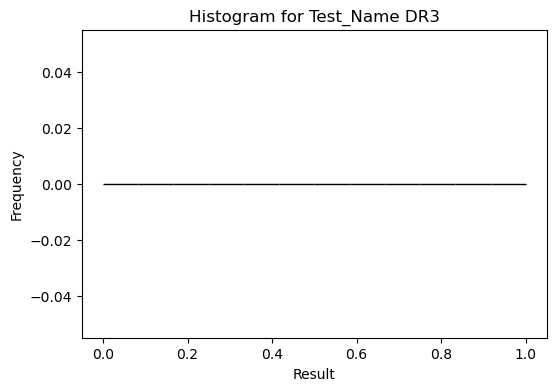

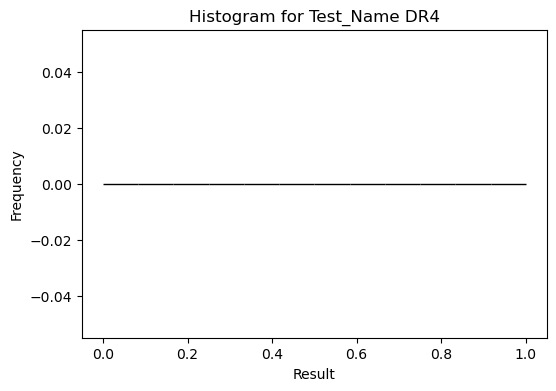

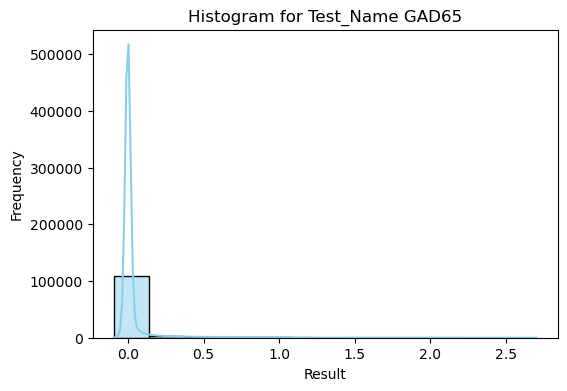

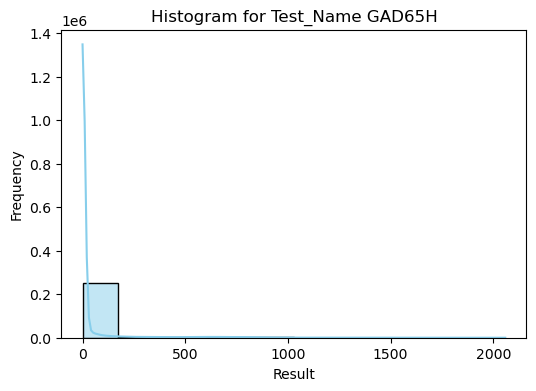

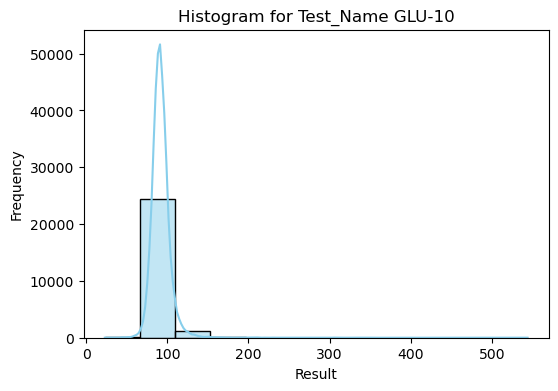

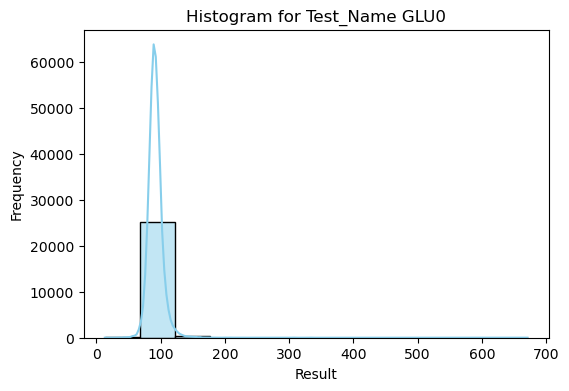

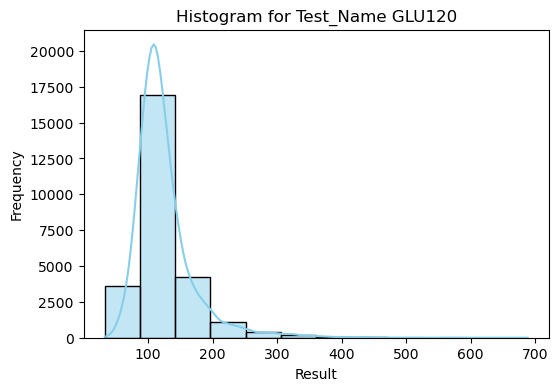

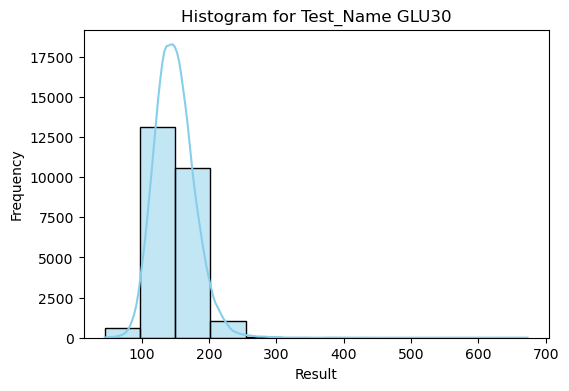

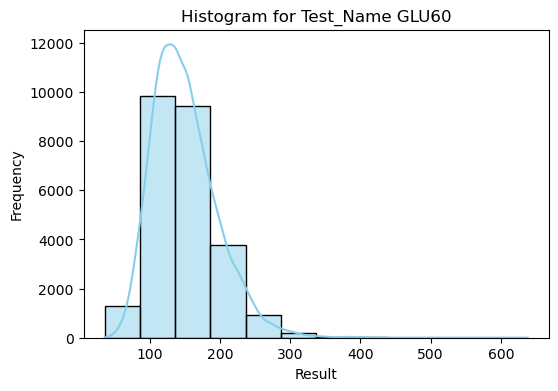

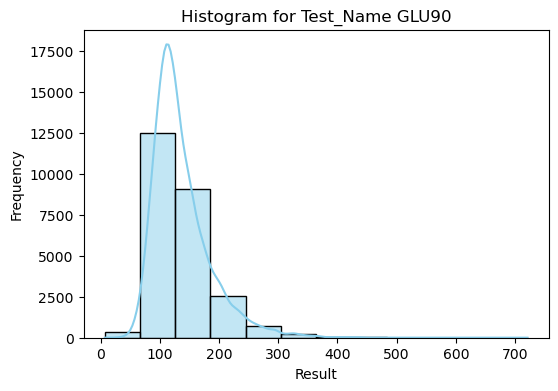

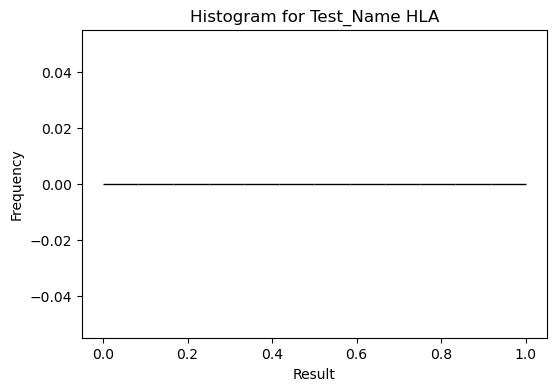

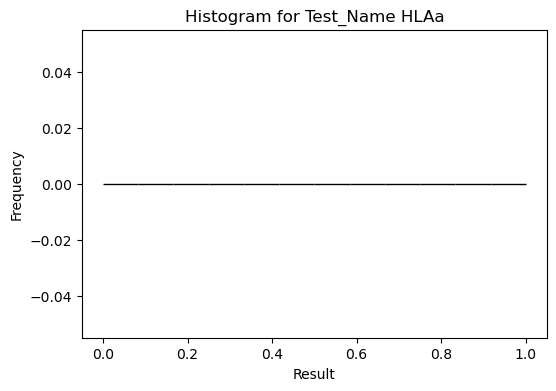

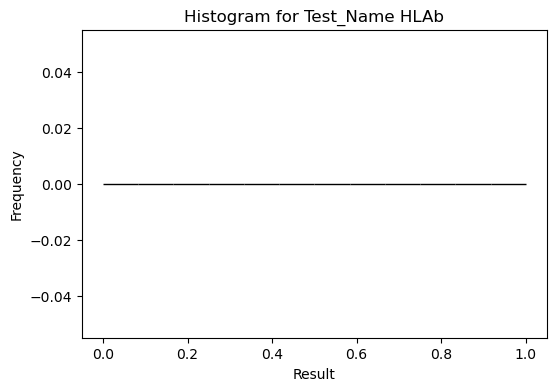

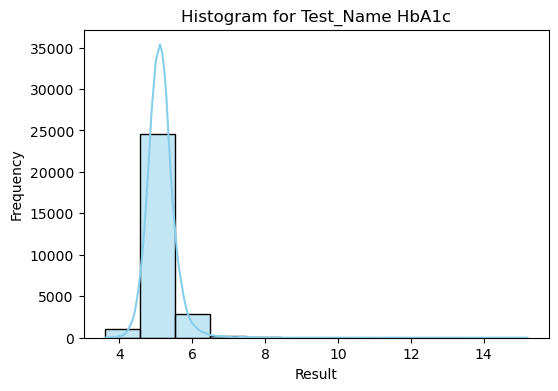

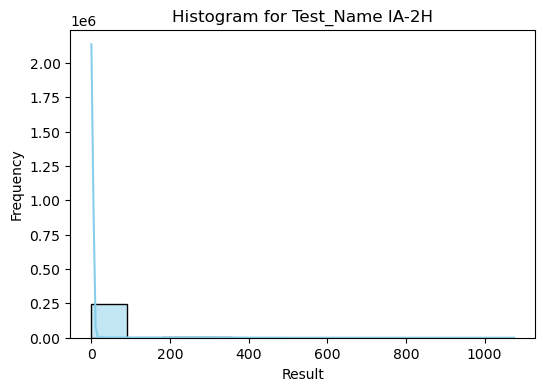

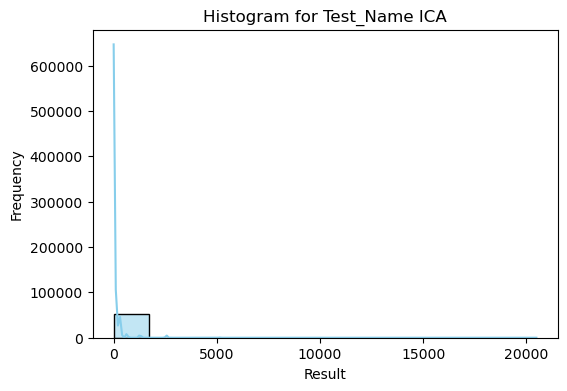

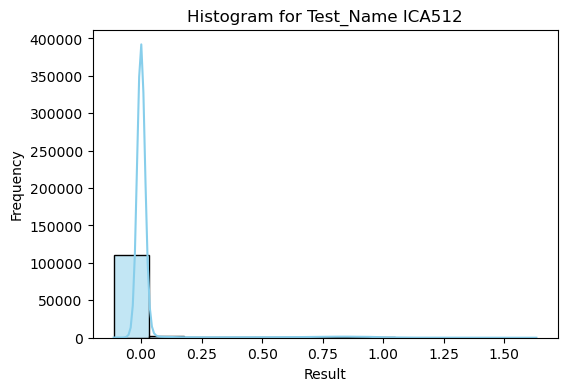

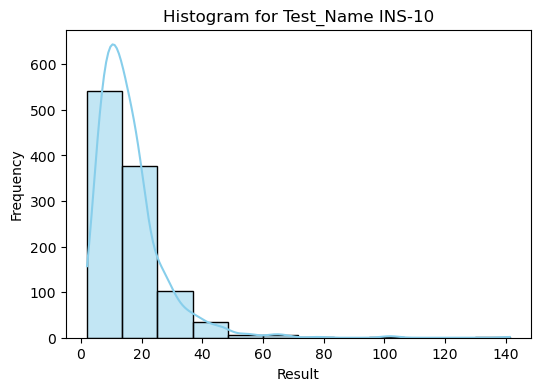

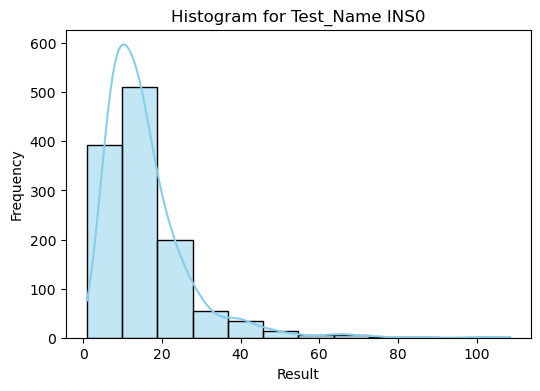

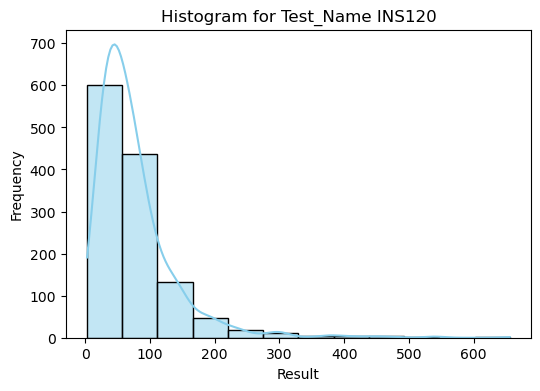

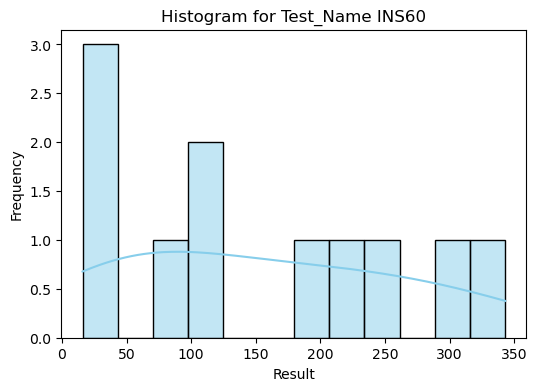

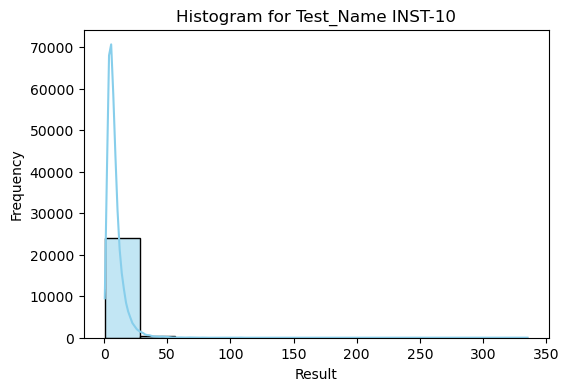

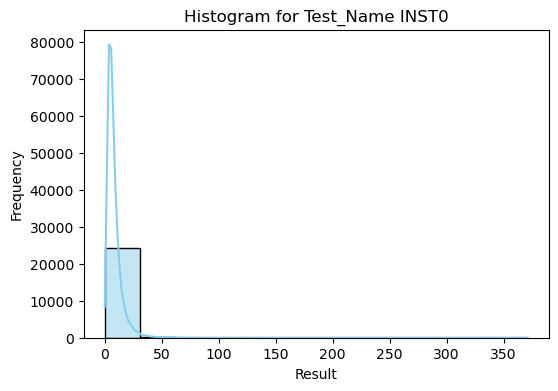

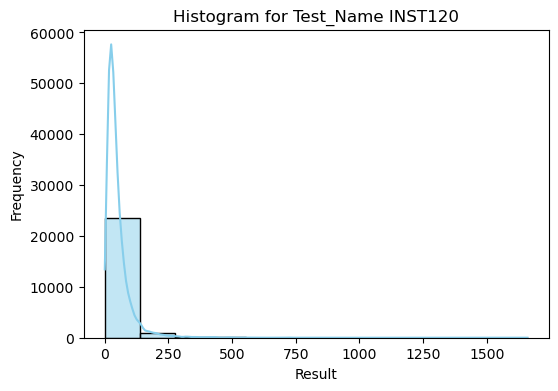

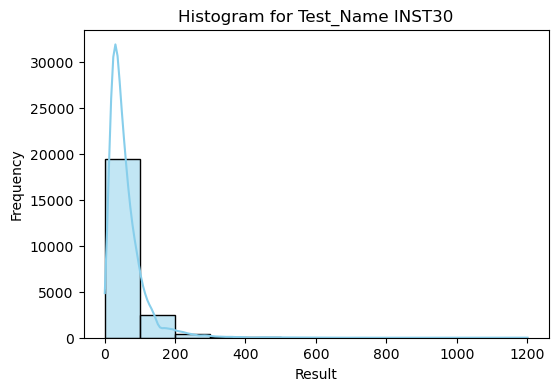

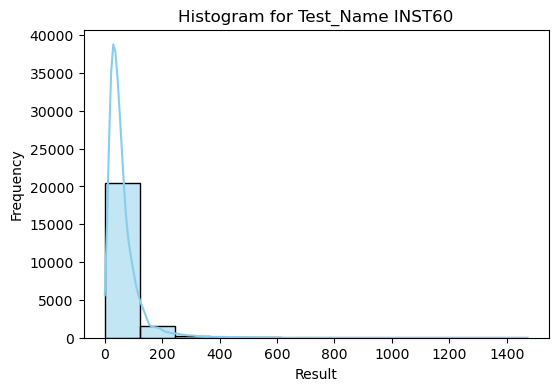

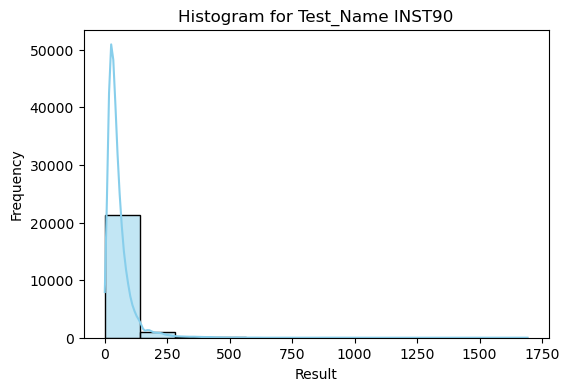

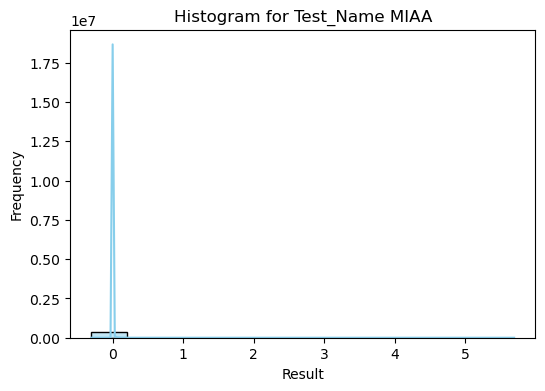

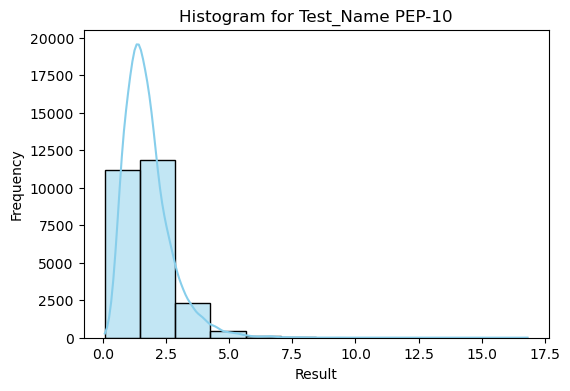

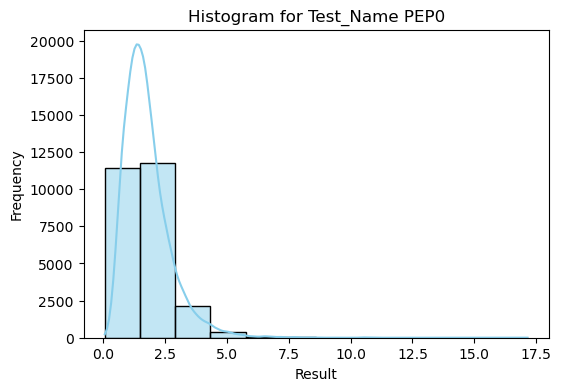

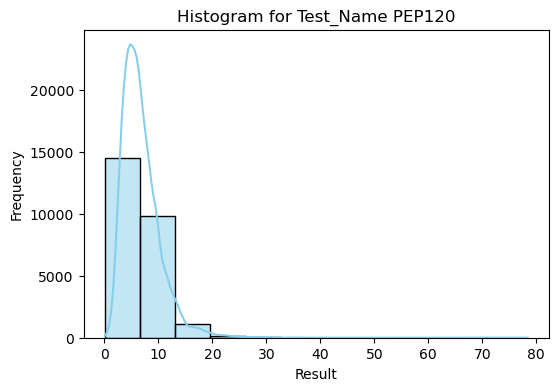

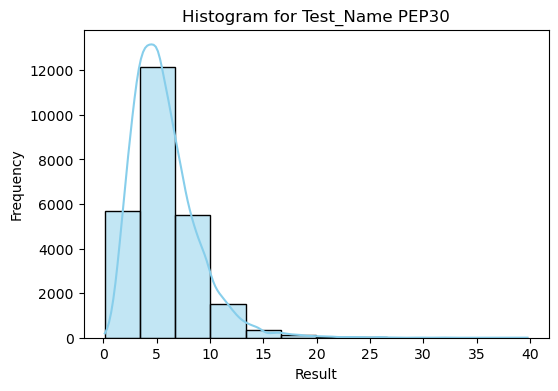

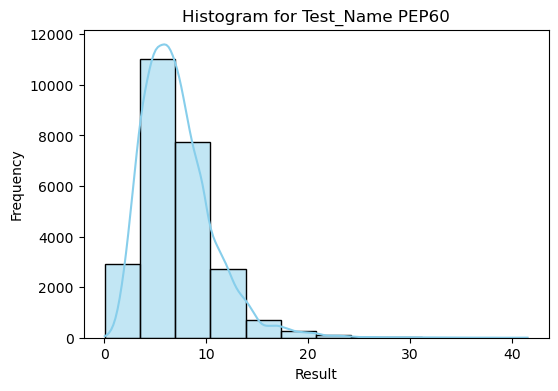

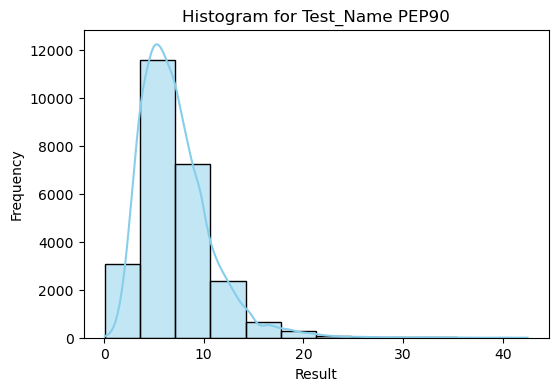

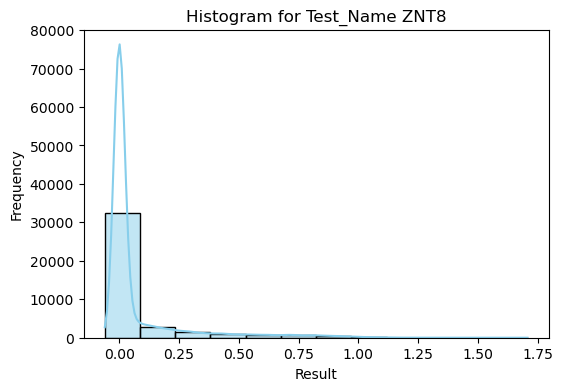

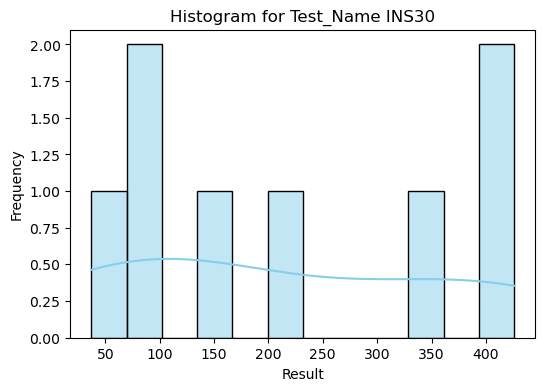

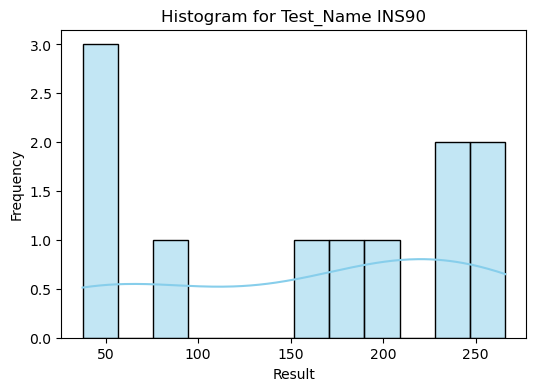

In [4]:
second_part_file = "/home/ec2-user/SageMaker/Team-5/data_processing/tests in second part of the merged data.csv"
second = pd.read_csv(second_part_file, low_memory=False)

display(second)

second['Result'] = pd.to_numeric(second['Result'], errors='coerce')
middle_99_values = second.groupby('Test_Name')['Result'].quantile([0.005, 0.995]).unstack(level=1).reset_index()
second = pd.merge(second, middle_99_values, on='Test_Name', suffixes=('', '_middle99'))
second['Within_Middle_99'] = (second['Result'] >= second[0.005]) & (second['Result'] <= second[0.995])
# second = second.drop([0.005, 0.995], axis=1)
display(second)
    
second['Result'] = second['Result'].astype(float)

for test_name in second['Test_Name'].unique():
    subset_data = second[second['Test_Name'] == test_name]
    
    plt.figure(figsize=(6, 4))
    sns.histplot(subset_data['Result'], bins=12, kde=True, color='skyblue', edgecolor="black")
    plt.title(f'Histogram for Test_Name {test_name}')
    plt.xlabel('Result')
    plt.ylabel('Frequency')
    plt.show()